In [6]:
# Importar las librerías necesarias
import pandas as pd

# Cargar los datos de un archivo CSV

df_superstore = pd.read_csv('C:/Users/ljgov/Documents/LABORATORIA/PROYECTO_ETL/superstore.csv')


In [8]:
import pandas as pd
uments/LABOimport hashlib
import os

# Función para generar un hash único de product_name y category
def generate_product_id(product_name, category):
    return hashlib.md5(f"{product_name}_{category}".encode()).hexdigest()[:8]  # Limitar a 8 caracteres

# Cargar el dataset original desde un archivo CSV o Excel
df = pd.read_csv('C:/Users/ljgov/DocRATORIA/PROYECTO_ETL/superstore.csv')

# Aplicar las transformaciones y normalizaciones necesarias como en tu código original
df['unknown'] = df['unknown'].replace('NA', 1)
df['order_priority_original'] = df['order_priority']

# Estandarización de textos
df['category'] = df['category'].str.capitalize()
df['city'] = df['city'].str.capitalize()
df['country'] = df['country'].str.capitalize()
df['order_priority'] = df['order_priority'].str.capitalize()
df['region'] = df['region'].str.capitalize()

# Corrección de errores tipográficos y normalización
df['country'] = df['country'].replace(['Us', 'U.s.'], 'United States')

# Solución para FutureWarning: Llamar explícitamente a infer_objects después de replace
df['order_priority'] = df['order_priority'].replace({
    'Critical': 4,
    'High': 3,
    'Medium': 2,
    'Low': 1
}).infer_objects(copy=False)

# Codificación de variables categóricas
category_mapping = {
    'Furniture': 1,
    'Office supplies': 2,
    'Technology': 3
}
df['category_code'] = df['category'].map(category_mapping)
df['category_code'].fillna(-1, inplace=True)

# Separar la fecha y la hora en columnas distintas (aunque la hora no se utiliza)
df['order_date_only'] = df['order_date'].str.split(' ').str[0]
df['ship_date_only'] = df['ship_date'].str.split(' ').str[0]

# Convertir las columnas de fecha al formato de fecha estándar sin especificar un formato
df['order_date'] = pd.to_datetime(df['order_date_only'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date_only'], errors='coerce')

# Verificar si hay fechas inválidas después de la conversión
print("Fechas inválidas después de la conversión:")
print(df[['order_date', 'ship_date']].isna().sum())

# Extraer componentes de la fecha solo si la conversión fue exitosa
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day

df['ship_year'] = df['ship_date'].dt.year
df['ship_month'] = df['ship_date'].dt.month
df['ship_day'] = df['ship_date'].dt.day

# Generar product_id basado en product_name y category con hash
df['product_id'] = df.apply(lambda x: generate_product_id(x['product_name'], x['category']), axis=1)

# Generar location_id basado en city, state, country y region
df['location_id'] = df['city'] + '_' + df['state'] + '_' + df['country'] + '_' + df['region']

# Reordenar las columnas
df = df[['customer_ID', 'customer_name', 'location_id', 'city', 'country', 'category', 'category_code', 'market', 'product_id',
          'product_name', 'discount', 'order_date', 'order_year', 'order_month', 'order_day', 'order_id',
         'order_priority_original', 'order_priority', 'profit', 'quantity', 'region', 'row_id', 'sales', 
         'ship_date', 'ship_year', 'ship_month', 'ship_day', 'ship_mode', 'shipping_cost', 'state', 
         'sub_category', 'year', 'market2', 'weeknum']]

# Verificación de resultados
display(df)

# Definir la ruta del directorio y archivo
directory = 'C:/Users/Luis Govea/Documents/LABORATORIA/PROYECTO_ETL'
file_path = os.path.join(directory, 'ruta_al_archivo_normalizado.csv')

# Crear el directorio si no existe
if not os.path.exists(directory):
    os.makedirs(directory)

# Guardar el archivo CSV
df.to_csv(file_path, index=False)


C:\Users\ljgov\AppData\Local\Temp\ipykernel_10600\2647291992.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['order_priority'] = df['order_priority'].replace({
C:\Users\ljgov\AppData\Local\Temp\ipykernel_10600\2647291992.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category_code'

Fechas inválidas después de la conversión:
order_date    0
ship_date     0
dtype: int64


,customer_ID,customer_name,location_id,city,country,category,category_code,market,product_id,product_name,...,ship_year,ship_month,ship_day,ship_mode,shipping_cost,state,sub_category,year,market2,weeknum
0,LS-172304,Lycoris Saunders,Los angeles_California_United states_West,Los angeles,United states,Office supplies,2,US,1712ebce,Xerox 225,...,2011,1,9,Second Class,4.37,California,Paper,2011,North America,2
1,MV-174854,Mark Van Huff,Los angeles_California_United states_West,Los angeles,United states,Office supplies,2,US,bf0636b7,"Wirebound Service Call Books, 5 1/2"" x 4""",...,2011,1,26,Standard Class,0.94,California,Paper,2011,North America,4
2,CS-121304,Chad Sievert,Los angeles_California_United states_West,Los angeles,United states,Office supplies,2,US,e5808cbc,"Adams Phone Message Book, Professional, 400 Me...",...,2011,8,9,Standard Class,1.81,California,Paper,2011,North America,32
3,CS-121304,Chad Sievert,Los angeles_California_United states_West,Los angeles,United states,Office supplies,2,US,5e31a32b,Xerox 1913,...,2011,8,9,Standard Class,4.59,California,Paper,2011,North America,32
4,AP-109154,Arthur Prichep,Los angeles_California_United states_West,Los angeles,United states,Office supplies,2,US,bc5c53cf,Xerox 223,...,2011,10,3,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,AM-103604,Alice McCarthy,Los angeles_California_United states_West,Los angeles,United states,Office supplies,2,US,e9a0f135,Satellite Sectional Post Binders,...,2014,12,4,Same Day,5.15,California,Binders,2014,North America,49
51286,AM-103604,Alice McCarthy,Los angeles_California_United states_West,Los angeles,United states,Office supplies,2,US,1f443828,Staples,...,2014,12,4,Same Day,0.44,California,Binders,2014,North America,49
51287,HR-147704,Hallie Redmond,Los angeles_California_United states_West,Los angeles,United states,Office supplies,2,US,4e67d2ff,GBC Plastic Binding Combs,...,2014,12,21,First Class,0.31,California,Binders,2014,North America,51
51288,RM-196754,Robert Marley,Los angeles_California_United states_West,Los angeles,United states,Office supplies,2,US,7458f674,Vinyl Sectional Post Binders,...,2014,12,26,First Class,15.95,California,Binders,2014,North America,52


In [9]:
# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns

# Variable para verificar si se encontraron valores no numéricos
valores_no_numericos_encontrados = False

# Encontrar valores no numéricos en columnas numéricas
for col in num_cols:
    # Convertir la columna a tipo numérico forzando errores a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Verificar si hay valores NaN (que eran textos u otros valores inválidos)
    if df[col].isnull().any():
        valores_no_numericos_encontrados = True
        print(f'Columna {col} tiene valores no numéricos.')
        print(df[df[col].isnull()][col])

# Mostrar mensaje si no se encontraron valores no numéricos
if not valores_no_numericos_encontrados:
    print('No se encontraron valores no numéricos en las columnas numéricas.')



No se encontraron valores no numéricos en las columnas numéricas.


In [3]:
# Resumen estadístico de las variables numéricas
numeric_summary = df.describe()
display(numeric_summary)

,category_code,discount,order_date,order_year,order_month,order_day,order_priority,profit,quantity,row_id,sales,ship_date,ship_year,ship_month,ship_day,shipping_cost,year,weeknum
count,51290.000000,51290.000000,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.00000,51290.000000,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2.005167,0.142883,2013-05-11 21:26:49.155780864,2012.777208,7.522636,15.782960,2.408286,28.610982,3.476545,25645.50000,246.498440,2013-05-15 20:42:42.745174784,2012.792728,7.463853,15.867694,26.375818,2012.777208,31.287112
min,1.000000,0.000000,2011-01-01 00:00:00,2011.000000,1.000000,1.000000,1.000000,-6599.978000,1.000000,1.00000,0.000000,2011-01-03 00:00:00,2011.000000,1.000000,1.000000,0.002000,2011.000000,1.000000
25%,2.000000,0.000000,2012-06-19 00:00:00,2012.000000,5.000000,8.000000,2.000000,0.000000,2.000000,12823.25000,31.000000,2012-06-23 00:00:00,2012.000000,5.000000,8.000000,2.610000,2012.000000,20.000000
50%,2.000000,0.000000,2013-07-08 00:00:00,2013.000000,8.000000,16.000000,2.000000,9.240000,3.000000,25645.50000,85.000000,2013-07-12 00:00:00,2013.000000,8.000000,16.000000,7.790000,2013.000000,33.000000
75%,2.000000,0.200000,2014-05-22 00:00:00,2014.000000,10.000000,23.000000,3.000000,36.810000,5.000000,38467.75000,251.000000,2014-05-26 00:00:00,2014.000000,10.000000,23.000000,24.450000,2014.000000,44.000000
max,3.000000,0.850000,2014-12-31 00:00:00,2014.000000,12.000000,31.000000,4.000000,8399.976000,14.000000,51290.00000,22638.000000,2015-01-07 00:00:00,2015.000000,12.000000,31.000000,933.570000,2014.000000,53.000000
std,0.624701,0.212285,NaN,1.098931,3.300056,8.742164,0.699603,174.340972,2.278766,14806.29199,487.567175,NaN,1.105303,3.346124,8.818105,57.296810,1.098931,14.429795


In [4]:
import pandas as pd

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Cálculo del rango intercuartil (IQR) para cada columna numérica
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Mostrar Q1, Q3 e IQR
summary_stats = pd.DataFrame({
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR
})

display(summary_stats)

,Q1,Q3,IQR
category_code,2.00,2.00,0.00
discount,0.00,0.20,0.20
order_year,2012.00,2014.00,2.00
order_month,5.00,10.00,5.00
order_day,8.00,23.00,15.00
order_priority,2.00,3.00,1.00
profit,0.00,36.81,36.81
quantity,2.00,5.00,3.00
row_id,12823.25,38467.75,25644.50
sales,31.00,251.00,220.00


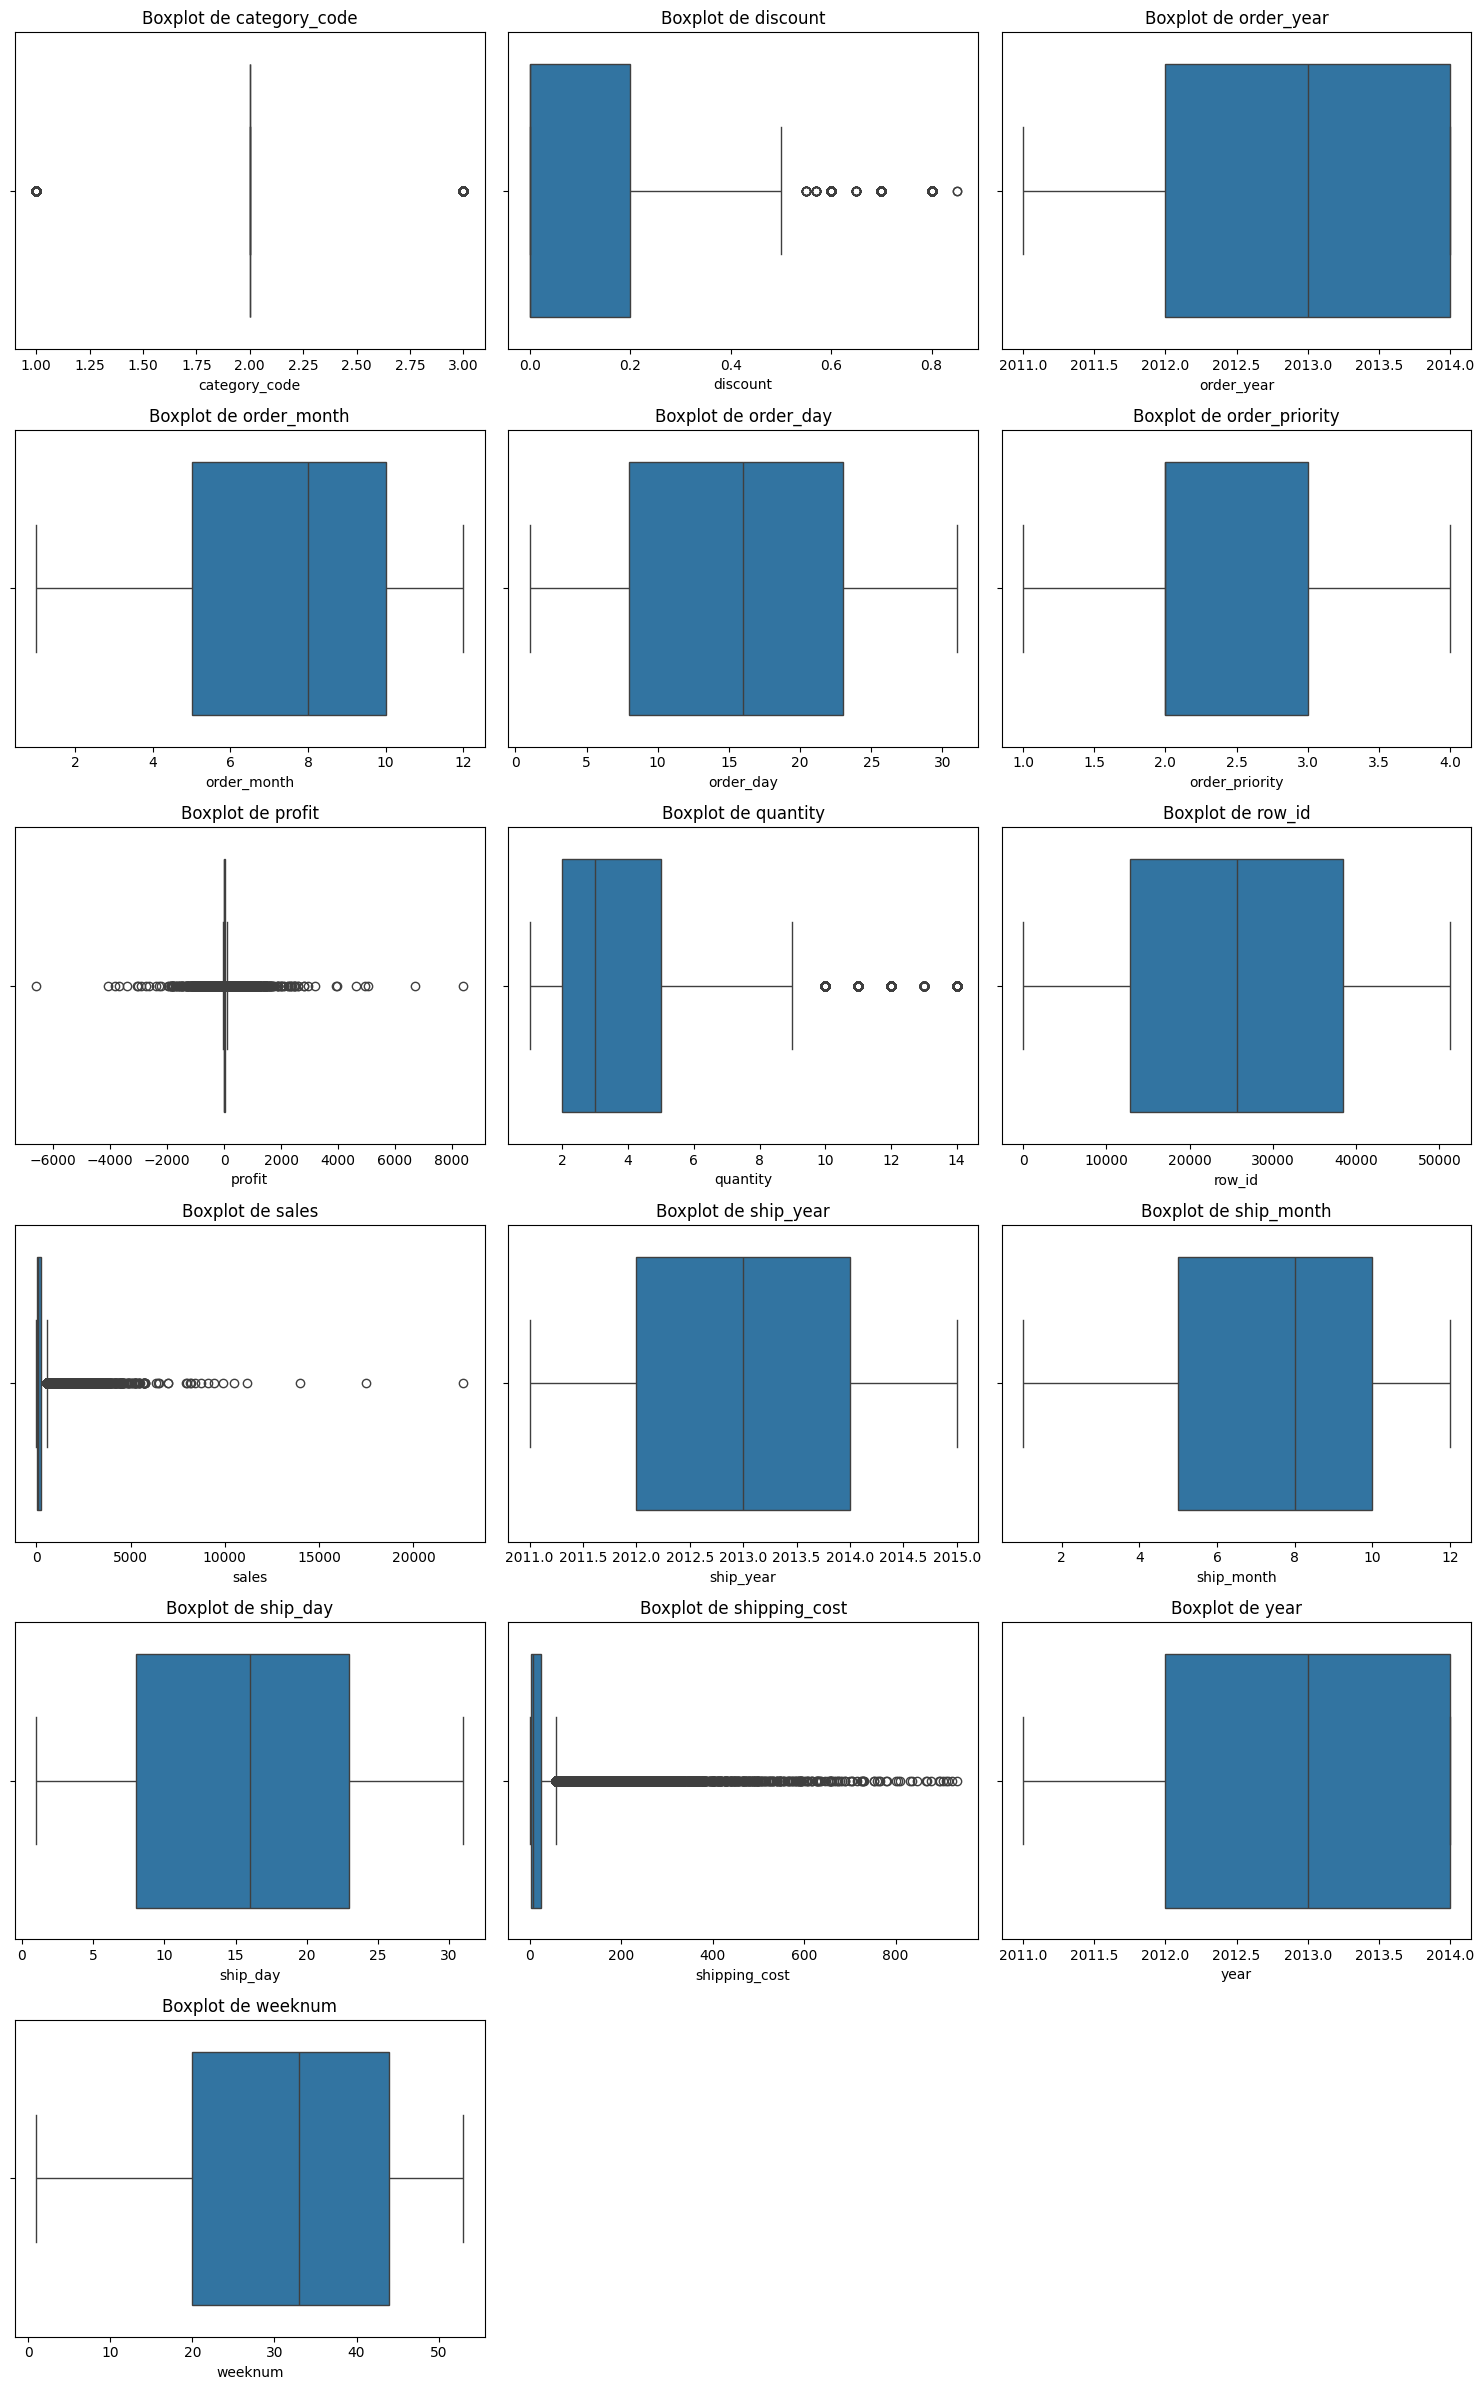

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Número de columnas en el layout
ncols = 3  # Ajusta el número de columnas según tu preferencia
nrows = len(numeric_df.columns) // ncols + int(len(numeric_df.columns) % ncols > 0)

# Crear una figura y ejes para los gráficos
plt.figure(figsize=(15, nrows * 4))

# Graficar boxplot para cada columna numérica
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x=numeric_df[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()



In [6]:
# Revisión de valores nulos en las variables numéricas
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [7]:
import pandas as pd
from IPython.display import display
def get_data_types(df):
    data_types = {col: df[col].dtypes.name for col in df.columns}
    return data_types
def display_data_types_summary(df):
    data_types = get_data_types(df)
    # Define the categories of types
    types = {
        'int': ['int8', 'int16', 'int32', 'int64', 'uint8', 'uint16', 'uint32', 'uint64', 'Int64'],
        'float': ['float16', 'float32', 'float64'],
        'datetime': ['datetime64[ns]', 'datetime64[s]', 'datetime64[ms]', 'datetime64[us]', 'datetime64[ns, UTC]', 'datetime64[us, UTC]'],
        'object': ['object']
    }
    # Initialize a dictionary to hold the columns by data type
    categorized_data_types = {cat: [] for cat in types}
    # Categorize each column by its data type
    for col, dtype in data_types.items():
        category = 'object'
        for cat, dtypes_list in types.items():
            if dtype in dtypes_list:
                category = cat
                break
        categorized_data_types[category].append(col)
    # Convert the dictionary to a DataFrame for display
    df_summary = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in categorized_data_types.items()]))
    # Replace NaN values with --
    df_summary = df_summary.fillna('--')
    # Display the DataFrame
    display(df_summary)
# Ejemplo de uso
display_data_types_summary(df)

,int,float,datetime,object
0,category_code,discount,order_date,customer_ID
1,order_year,profit,ship_date,customer_name
2,order_month,shipping_cost,--,city
3,order_day,--,--,country
4,order_priority,--,--,category
5,quantity,--,--,market
6,row_id,--,--,product_name
7,sales,--,--,order_id
8,ship_year,--,--,order_priority_original
9,ship_month,--,--,region


In [13]:
import pandas as pd
import numpy as np
import re

# Cargar el dataset
df = pd.read_csv('C:/Users/ljgov/Documents/LABORATORIA/PROYECTO_ETL/supermarket_chains.csv')

# 1. Eliminar lo que está entre paréntesis en 'Served_countries'
df['served_countries'] = df['served_countries'].apply(lambda x: re.sub(r"\s*\(.*?\)", "", x) if isinstance(x, str) else x)

# 2. Cambiar el valor de 'Headquarters' para la empresa 'SHV Holdings'
df.loc[df['Company'] == 'SHV Holdings', 'Headquarters'] = 'The Netherlands'

# 3. Convertir 'Number_of_locations' a string antes de asignar un nuevo valor
df['number_of_locations'] = df['number_of_locations'].astype(str)

# 4. Actualizar el valor de 'Number_of_locations' para la empresa 'Leader Price' a '545'
df.loc[df['Company'] == 'Leader Price', 'number_of_locations'] = '545'

# 5. Convertir 'Number_of_employees' a string
df['number_of_employees'] = df['number_of_employees'].astype(str)

# 6. Asignar 'NA' a los valores vacíos en 'Number_of_locations'
df['number_of_locations'].fillna('NA', inplace=True)

# 7. Asignar 'NA' a los valores vacíos en 'Number_of_employees'
df['number_of_employees'].fillna('NA', inplace=True)

# 8. Reemplazar valores nulos en 'Served_countries' con el valor de 'Headquarters'
df['served_countries'].fillna(df['Headquarters'], inplace=True)

# 9. Crear una columna con la cantidad de países servidos
df['number_of_served_countries'] = df['served_countries'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Renombrar la columna 'Company' a 'company'
df.rename(columns={'Company': 'company'}, inplace=True)

# Guardar el dataset actualizado
#df.to_csv('supermarket_chains_clean.csv', index=False)

# Reordenar las columnas
df = df[['company', 'company_id', 'served_countries', 'number_of_locations', 'number_of_employees', 'number_of_served_countries']]

# Mostrar una muestra de las filas procesadas
display("Limpieza completada, cambios aplicados y nulos en 'served_countries' reemplazados por 'Headquarters'.")
display(df.head())

# Guarda el DataFrame como un archivo CSV
#df_list.to_csv('supermarket_chains.csv', index=False)


KeyError: 'served_countries'